## the point of this project is to classify the 10 digits (0,1...9) from the MNIST dataset.
subsmapled images will be used (scaled imaged)

Using linear regression

https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
  

    

Get the images


In [6]:
from mnist import MNIST
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.misc

%matplotlib inline

mndata = MNIST('./data')
images, labels = mndata.load_training()

60000
60000


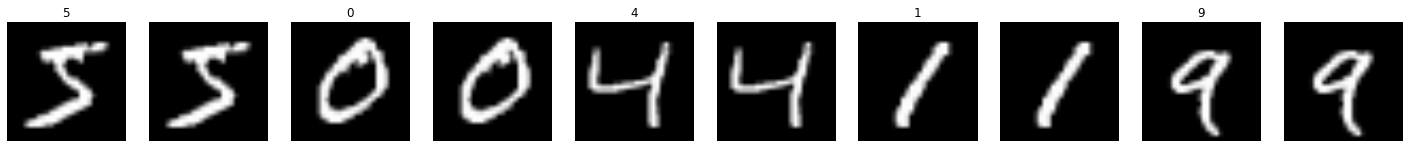

In [7]:
datasetsize = 60000
images = images[0:datasetsize]
labels = labels[0:datasetsize]
print(len(labels))
print(len(images))

digitsize = 28

# convert into an array of array of pixel.
images = np.array(images).reshape(len(images),28,28)


# Scale image
img_scaled = []
for n in range(len(images)):
    displayimg = sp.misc.imresize(images[n], (digitsize,digitsize)) # values are ranging from 0 to 255
    displayimg = displayimg.reshape(digitsize*digitsize) # reshape the 2x2 array into a simple pixel vector
    img_scaled.append(displayimg)

# Plot the training dataset
plt.gray()
fig = plt.figure(figsize=(25,25))
for n in range(5):
    a = plt.subplot(10,10,(n*2)+1)
    plt.title(labels[n])

    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(images[n])
    #print(displayimg)
    a = plt.subplot(10,10,(n*2)+2)
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(img_scaled[n].reshape(digitsize,digitsize))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# set values in the [0;1] interval instead of [0;255]
# img_scaled = np.array(img_scaled)/255
labels = np.array(labels).reshape(len(labels), 1)

#Process labels.
# create a vector out of a digit. For instance 3 = [0,0,0,1,0...]
vect_labels = []
for n in range(len(labels)):
    vect = np.zeros(10)
    vect[labels[n]] = 1
    vect_labels.append(vect)

vect_labels = np.array(vect_labels).reshape(len(labels), 10)


# create weights vector
vect_w = np.ones((10,digitsize**2+1))
# alternative is : 
# vect_w = np.random.rand(10,digitsize**2+1)
    
#digits = np.insert(img_scaled, 0, 1, axis=1) # insert 1s in 0th columns of each row (bias)
X = img_scaled

y = labels.reshape(len(labels))
print(y)
# For fun, split train into train and test
test_size = 0.01
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = test_size,
                                                   random_state = random_state)

sc = StandardScaler()
# fit the scaler only to the training set
sc.fit(X_train)
# apply the scale on both the training and testing set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

n_iter = 40
eta0 = 0.1 # learning rate

print("X_train shape: ", X_train_std.shape)
print("y train: ", y_train.shape)

'''
ppn = Perceptron(max_iter = n_iter,
                eta0 = eta0,
                random_state = random_state)


# fit the model
print('Fitting the model... please wait...')
ppn.fit(X_train_std, 
       y_train)
print('Fitting done')

# Make prediction
print('Compute accuracy on test sample')
y_pred = ppn.predict(X_test_std)


'''
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(X_train_std, y_train)
y_pred = logisticRegr.predict(X_test_std)

# Measure performance via accuracy score
print("Accuracy : {0:.2f}%".format(accuracy_score(y_test,
                                                y_pred)*100))




[5 0 4 ..., 5 6 8]
X_train shape:  (59400, 784)
y train:  (59400,)
Accuracy : 92.00%


### now use the weight found at the previous step to guess some digits...


In [9]:
mndata = MNIST('./data')
images_test, labels_test = mndata.load_testing()
print("Test set size is : {}".format(len(images_test)))

Test set size is : 10000


1000
1000
X_train shape:  (1000, 784)
y train:  (1000,)
Accuracy : 90.90%


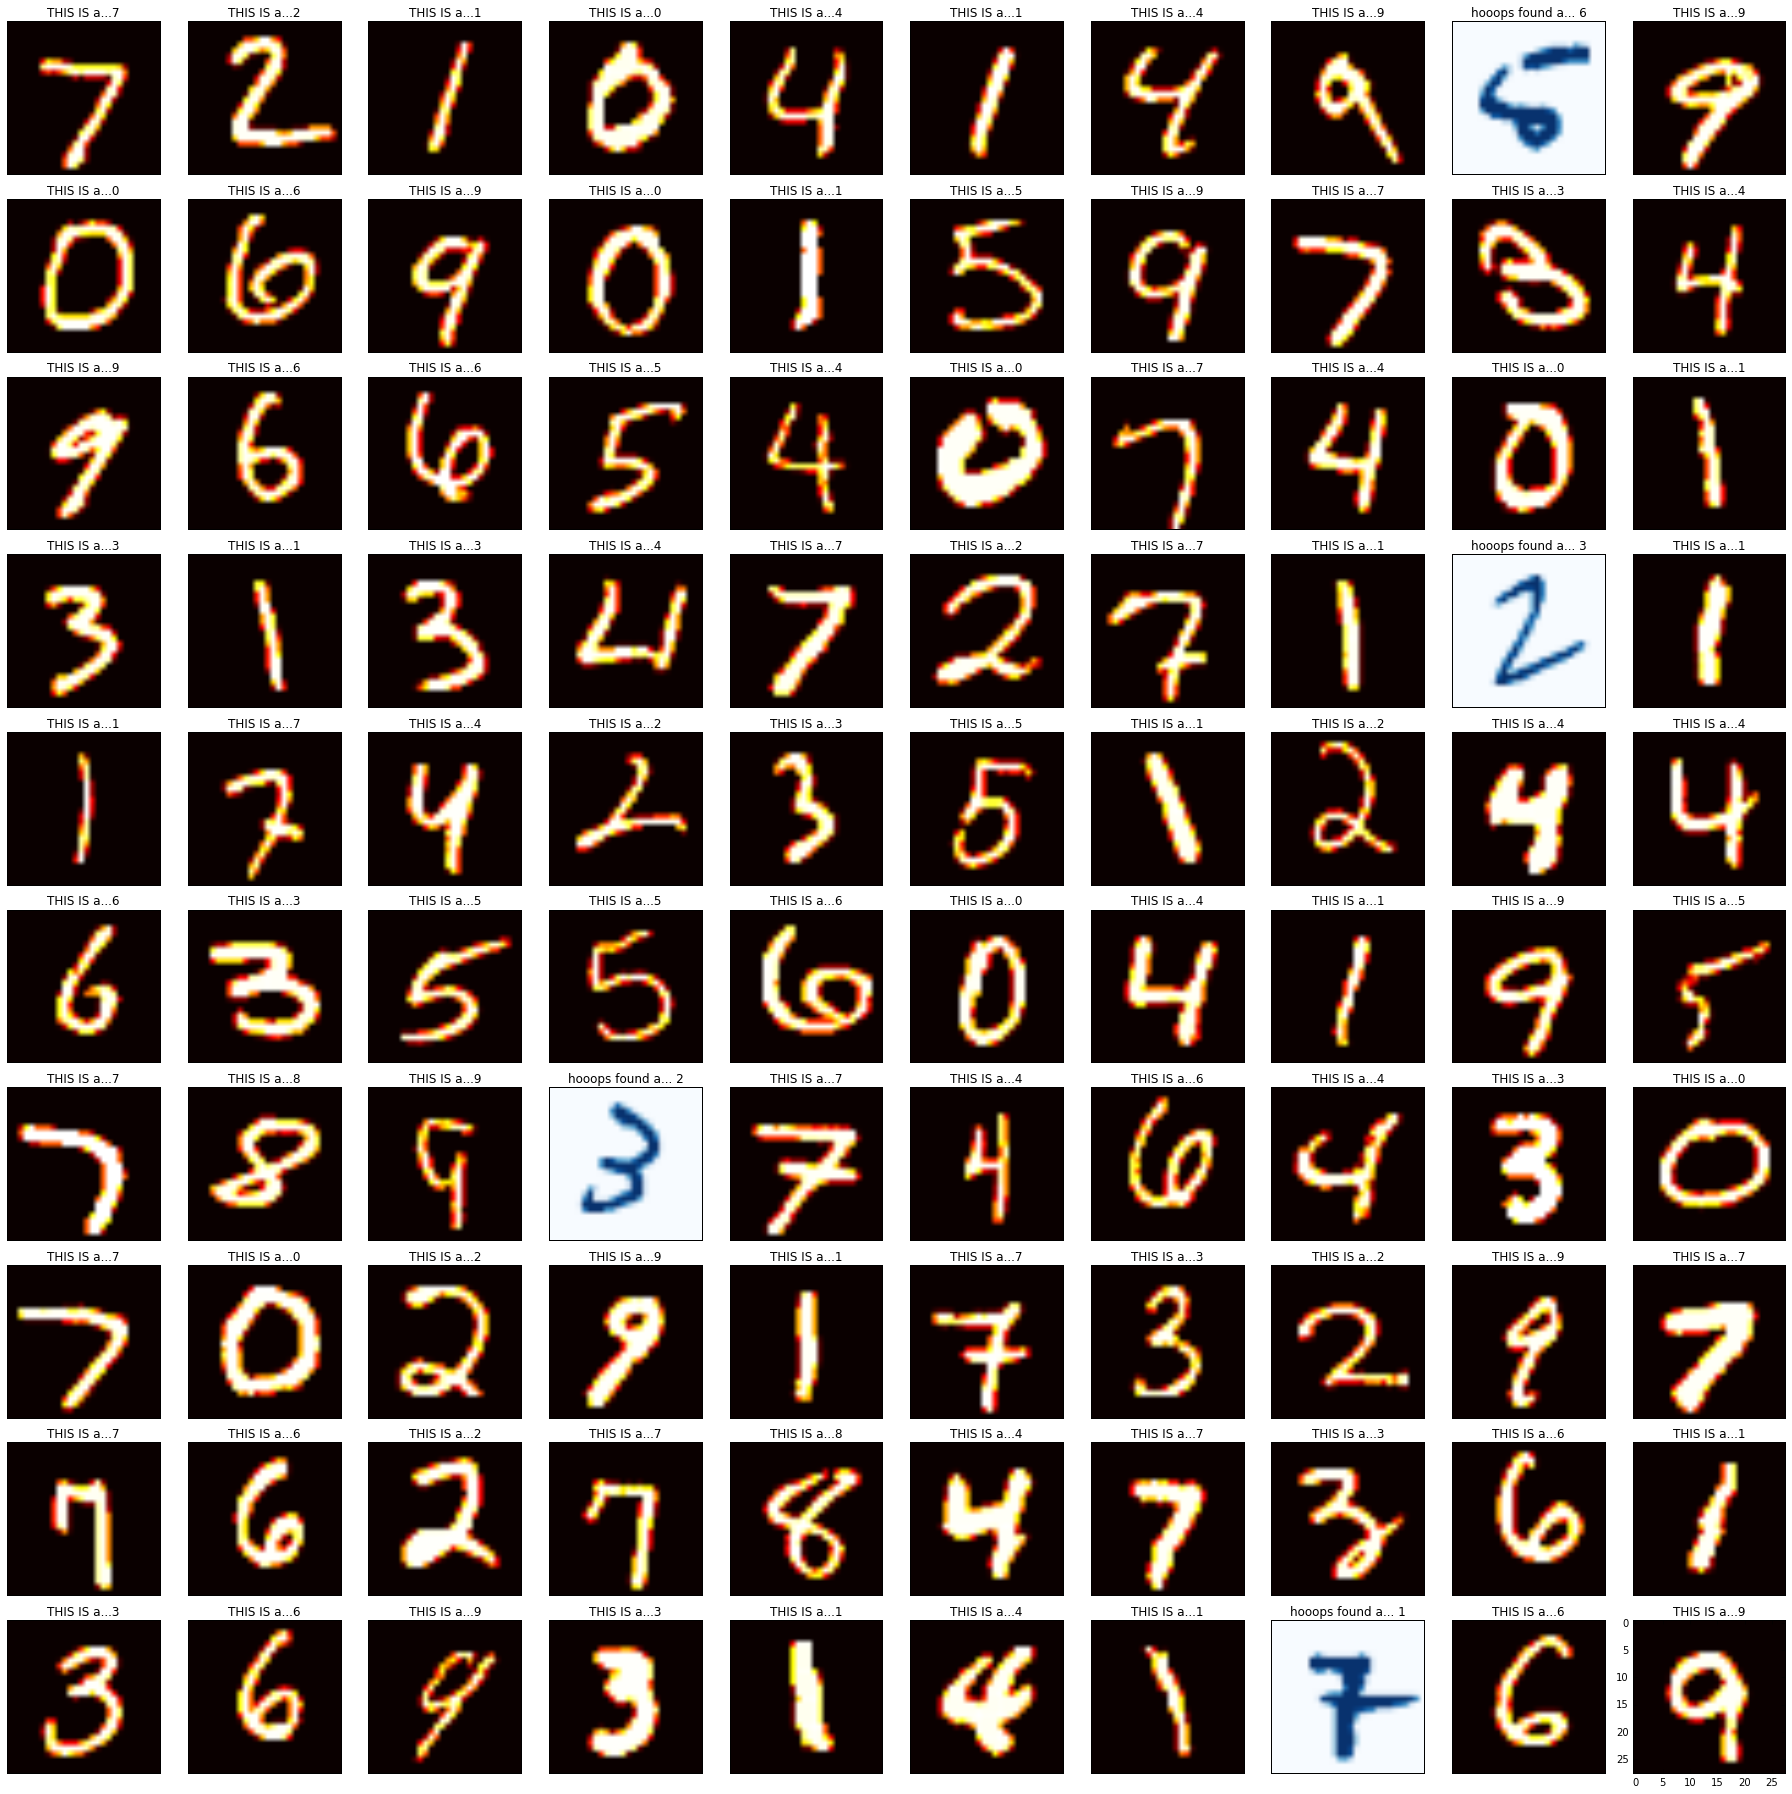

In [10]:
testsetsize = 1000
images_test = images_test[0:testsetsize]
labels_test = labels_test[0:testsetsize]

print(len(labels_test))
print(len(images_test))
#print(images[0])
# pre-init
img_test = np.array(images_test).reshape(len(images_test),28,28)

img_scaled_test = []
for n in range(len(images_test)):
    displayimg_test = sp.misc.imresize(img_test[n], (digitsize,digitsize)) # values are ranging from 0 to 255
    displayimg_test = displayimg_test.reshape(digitsize*digitsize)

    img_scaled_test.append(displayimg_test)

#img_scaled_test_norm = np.array(img_scaled_test)/255



X_test = img_scaled_test

y_test = np.array(labels_test).reshape(len(labels_test))
#print(y_test)

X_test_std = sc.transform(X_test)

print("X_train shape: ", X_test_std.shape)
print("y train: ", y_test.shape)

# Make prediction
y_pred = logisticRegr.predict(X_test_std)


# Measure performance via accuracy score
print("Accuracy : {0:.2f}%".format(accuracy_score(y_test,
                                                y_pred)*100))



plt.gray()
fig = plt.figure(figsize=(25,25))

for n in range(100):
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    a = plt.subplot(10,10,n+1)
    plt.imshow(img_scaled_test[n].reshape(digitsize,digitsize))

    if y_pred[n] == labels_test[n]:
        plt.title('THIS IS a...' + str(y_pred[n]))
        plt.set_cmap('hot')
    else:
        plt.title('hooops found a... ' + str(y_pred[n]))
        plt.set_cmap('Blues')

plt.tight_layout()

#print(img_scaled)
labels_test = np.array(labels_test).reshape(len(labels_test), 1)
